Using backend: tensorflow.compat.v1

2021-12-14 14:07:51.100068: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


Instructions for updating:
non-resource variables are not supported in the long term




heat_1d_boundary_sin_exact: Average time with 25 tries: 0.0003 seconds
finite_difference_crank_nicolson: Average time with 25 tries: 0.0083 seconds


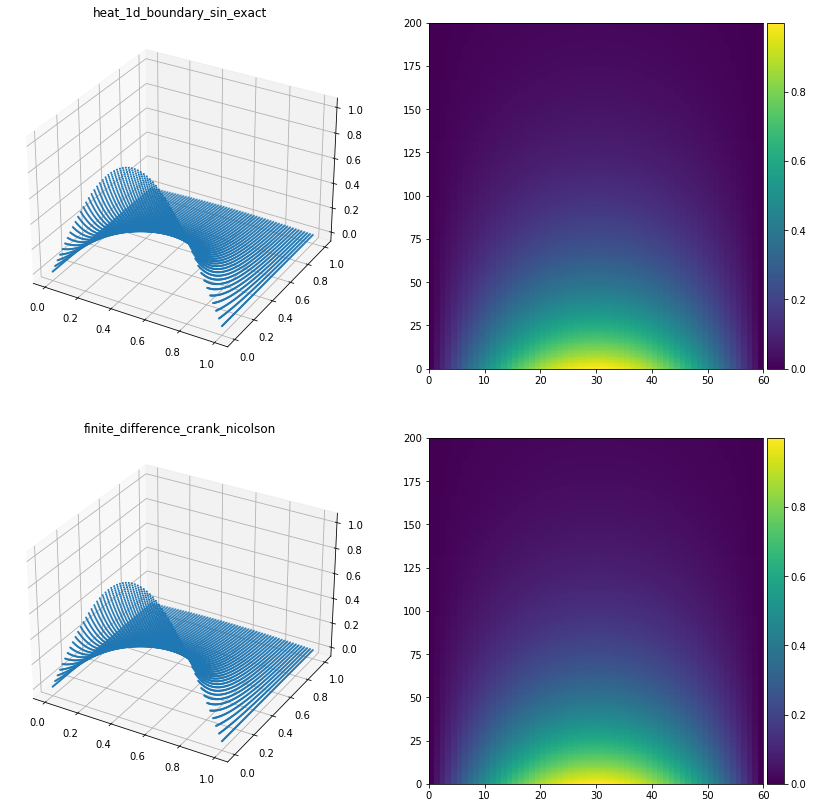

In [1]:
from heat_pinn import *

TIMER_REPEAT_TIMES = 25

# Generate constants throughout this app!!
const_params = PinnConstParam()
solve_analytical_and_numerical(const_params)
plotter = Plotter(2, 2)
plot_analytical_and_numerical(plotter, const_params)


# Test 1: Default parameters from DeepXde

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "


train_bc_points shape (240, 2)
train_points shape (2780, 2)
train_next_batch shape (3020, 2)


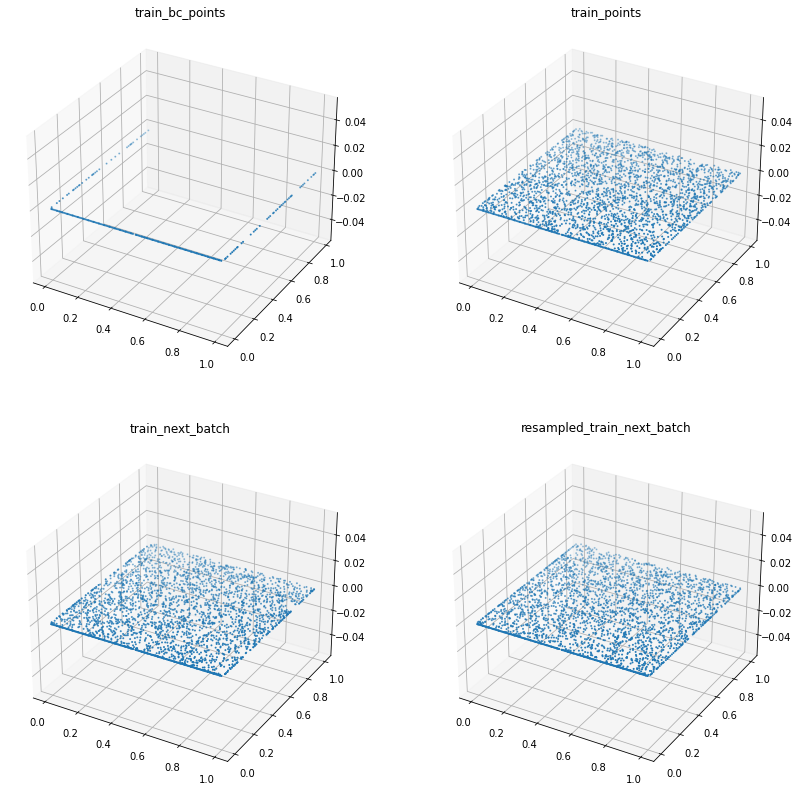

In [2]:
# Create model and plot training data
test_params = PinnTestParam()
geomtime_data, model = create_model(const_params, test_params)
plot_train_data(geomtime_data)

Compiling model...
Building feed-forward neural network...
'build' took 0.031238 s



/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-12-13 16:41:38.232921: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-13 16:41:38.233502: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-12-13 16:41:38.258774: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_UNKNOWN: un

'compile' took 0.222378 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [7.81e-03, 1.60e-01, 2.17e-01]    [6.71e-03, 1.60e-01, 2.17e-01]    []  


2021-12-13 16:41:38.427895: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:196] None of the MLIR optimization passes are enabled (registered 0 passes)
2021-12-13 16:41:38.450525: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3593190000 Hz


1000      [1.12e-03, 3.46e-04, 1.26e-04]    [6.36e-04, 3.46e-04, 1.26e-04]    []  
2000      [2.48e-04, 1.18e-04, 4.28e-05]    [1.47e-04, 1.18e-04, 4.28e-05]    []  
3000      [2.94e-04, 1.04e-04, 1.30e-04]    [2.74e-04, 1.04e-04, 1.30e-04]    []  
4000      [5.72e-05, 3.27e-05, 9.25e-06]    [4.24e-05, 3.27e-05, 9.25e-06]    []  
5000      [3.53e-05, 2.06e-05, 5.14e-06]    [2.39e-05, 2.06e-05, 5.14e-06]    []  
6000      [2.53e-05, 1.31e-05, 3.21e-06]    [1.66e-05, 1.31e-05, 3.21e-06]    []  
7000      [2.80e-05, 1.56e-05, 1.26e-05]    [2.22e-05, 1.56e-05, 1.26e-05]    []  
8000      [2.01e-05, 6.30e-06, 1.43e-06]    [1.23e-05, 6.30e-06, 1.43e-06]    []  
9000      [1.51e-05, 3.56e-06, 1.05e-06]    [1.03e-05, 3.56e-06, 1.05e-06]    []  
10000     [1.31e-05, 2.33e-06, 5.88e-07]    [8.57e-06, 2.33e-06, 5.88e-07]    []  
11000     [1.18e-05, 2.39e-06, 8.44e-07]    [7.88e-06, 2.39e-06, 8.44e-07]    []  
12000     [1.08e-05, 1.36e-06, 3.21e-07]    [6.90e-06, 1.36e-06, 3.21e-07]    []  
1300

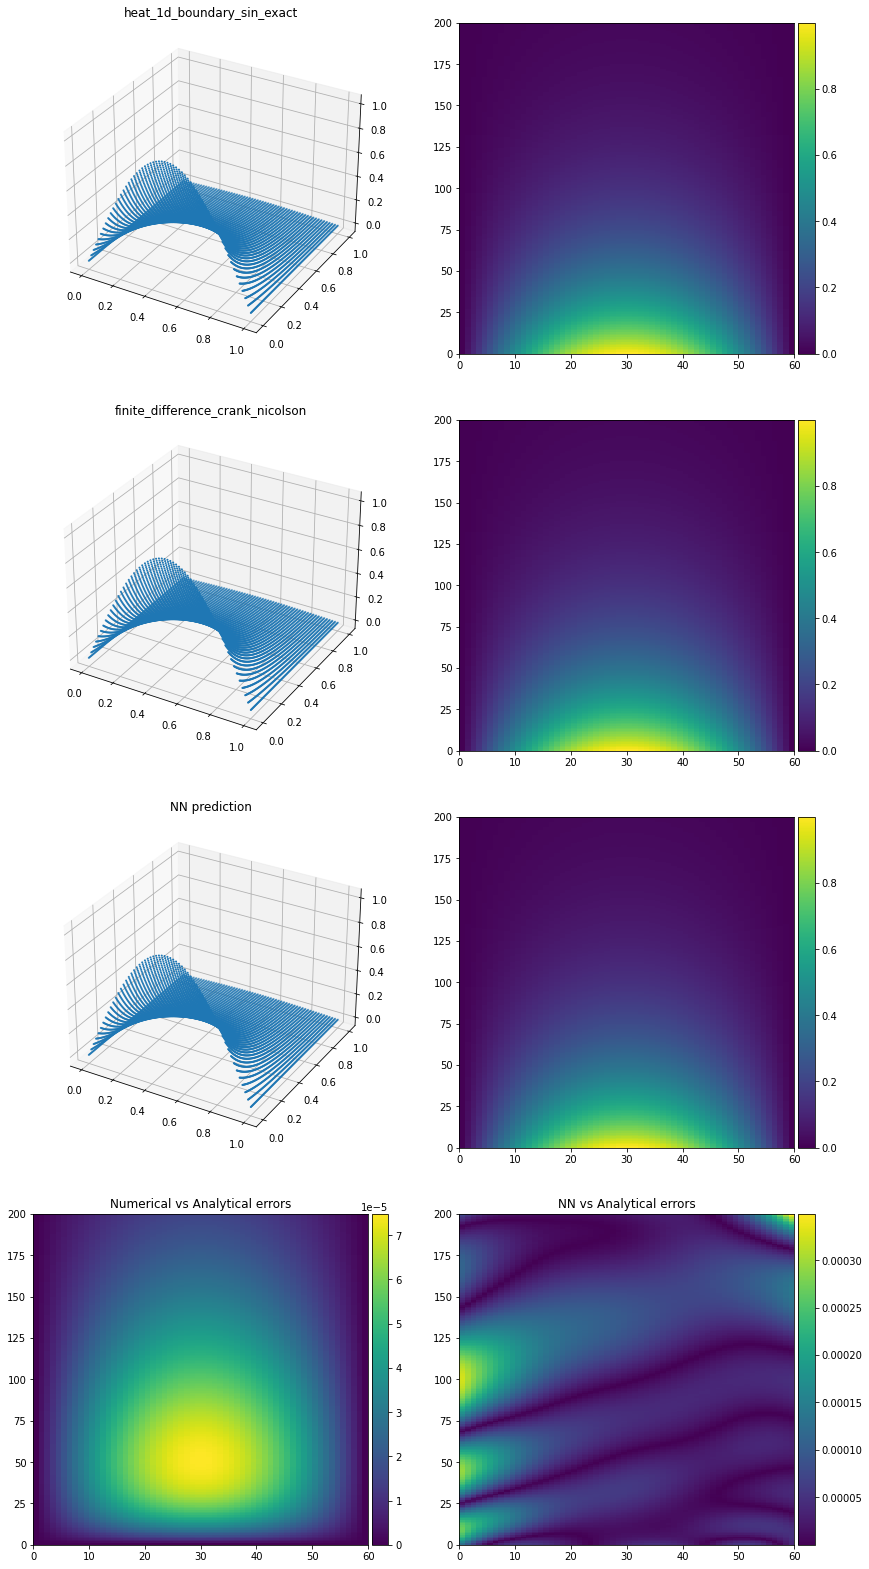

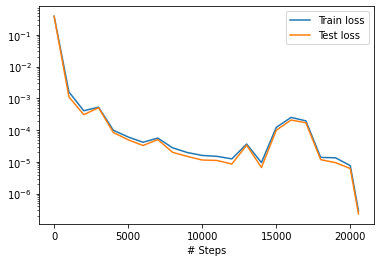

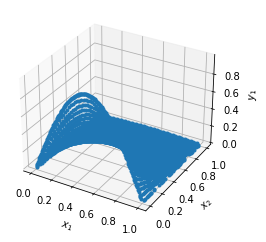

IGNORE ^^^ PDE test data SOLUTION PLOT!!! ^^^
--- Numerical vs Analytical Report ---
Mean absolute error:  2.9059873630420946e-05
Mean squared error:  1.26415187285393e-09
Max error:  7.483296180527121e-05
--- NN vs Analytical Report ---
Mean absolute error:  5.732550075097705e-05
Mean squared error:  6.266178254453738e-09
Max error:  0.00034864246845245123
Pinn Const Param: 
a: 0.4
L: 1
n: 1
t_end: 1
test_x_dim: 60
test_t_dim: 200
analytical_function_name: heat_1d_boundary_sin_exact
numerical_function_name: finite_difference_crank_nicolson

Pinn Test Param: 
d_num_domain: 2540
d_num_boundary: 80
d_num_initial: 160
nn_hidden_layer_size: 20
nn_hidden_layer_num: 3



In [3]:
# Train model and output results
losshistory, train_state = train_model(model)
predict_and_output_report(const_params, model, losshistory, train_state, test_params=test_params)


# Test 2: Reduce hidden layers and size to break solution

In [4]:
test_params = PinnTestParam()
test_params.nn_hidden_layer_num = 1
test_params.nn_hidden_layer_size = 5

geomtime_data, model = create_model(const_params, test_params)

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "


Compiling model...
Building feed-forward neural network...
'build' took 0.019386 s

'compile' took 0.139921 s



/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-12-13 16:42:47.948727: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set


Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [2.80e-01, 8.52e-02, 3.42e-01]    [2.78e-01, 8.52e-02, 3.42e-01]    []  
1000      [2.03e-02, 4.26e-02, 8.77e-02]    [1.75e-02, 4.26e-02, 8.77e-02]    []  
2000      [2.02e-02, 3.93e-02, 7.44e-02]    [1.75e-02, 3.93e-02, 7.44e-02]    []  
3000      [1.68e-02, 3.84e-02, 6.80e-02]    [1.46e-02, 3.84e-02, 6.80e-02]    []  
4000      [1.50e-02, 3.60e-02, 6.09e-02]    [1.29e-02, 3.60e-02, 6.09e-02]    []  
5000      [1.49e-02, 1.74e-02, 3.74e-02]    [1.30e-02, 1.74e-02, 3.74e-02]    []  
6000      [9.62e-03, 4.44e-03, 1.23e-02]    [6.87e-03, 4.44e-03, 1.23e-02]    []  
7000      [7.96e-03, 4.32e-03, 1.03e-02]    [5.64e-03, 4.32e-03, 1.03e-02]    []  
8000      [6.47e-03, 4.64e-03, 8.70e-03]    [4.69e-03, 4.64e-03, 8.70e-03]    []  
9000      [5.61e-03, 4.90e-03, 7.66e-03]    [4.28e-03, 4.90e-03, 7.66e-03]    []  
10000     [5.13e-03, 4.95e-03, 7.10

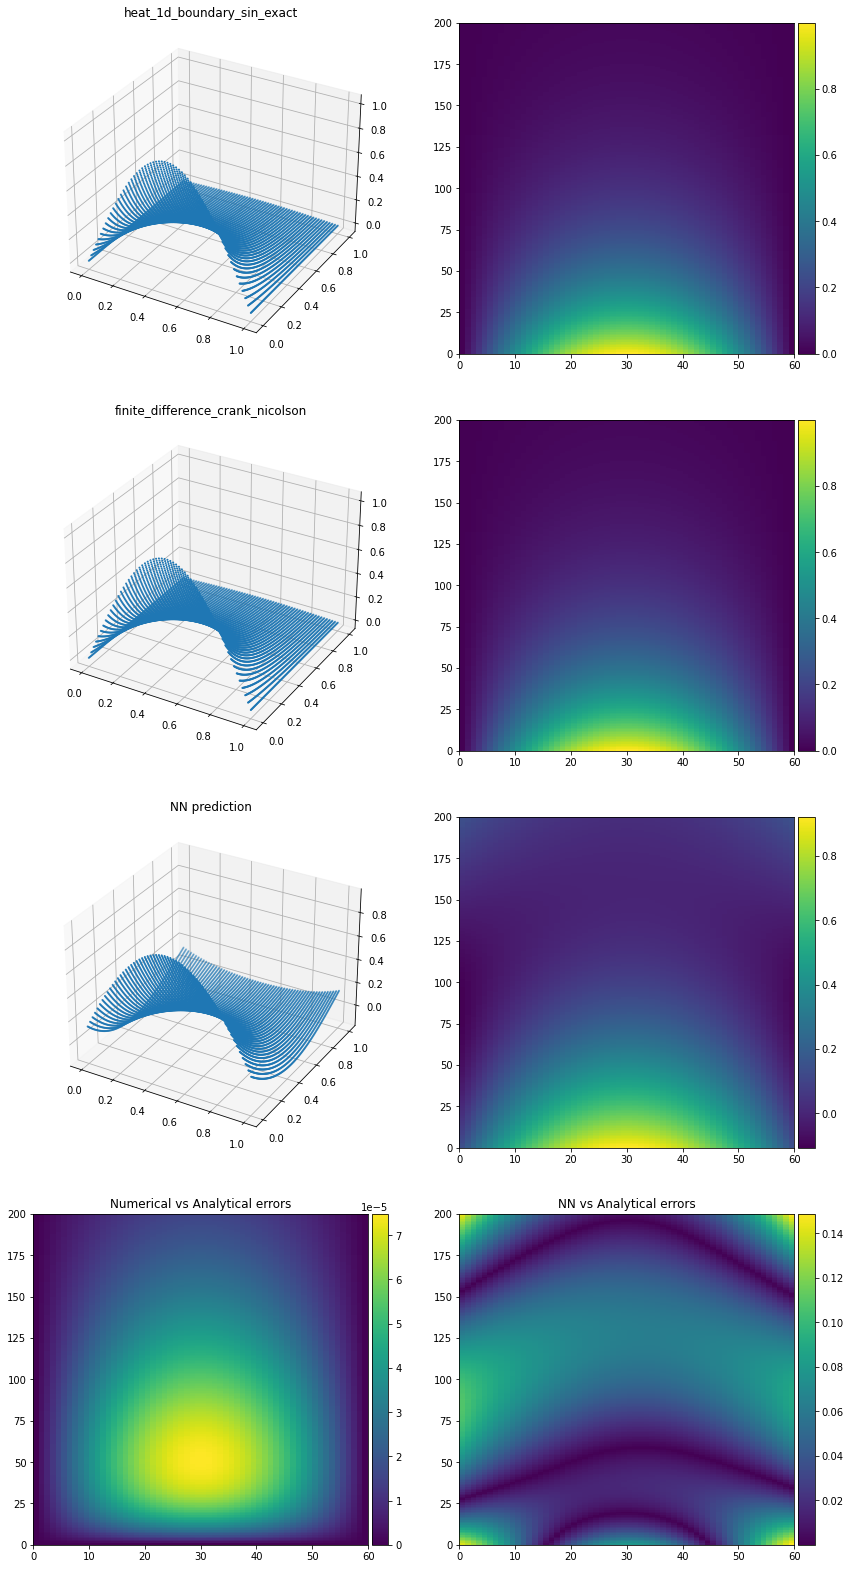

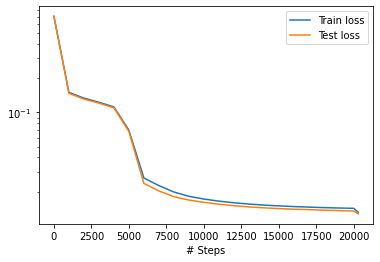

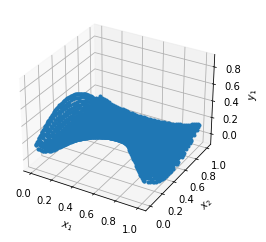

IGNORE ^^^ PDE test data SOLUTION PLOT!!! ^^^
--- Numerical vs Analytical Report ---
Mean absolute error:  2.9059873630420946e-05
Mean squared error:  1.26415187285393e-09
Max error:  7.483296180527121e-05
--- NN vs Analytical Report ---
Mean absolute error:  0.04147062553686869
Mean squared error:  0.0024416380841672095
Max error:  0.14879125356674194
Pinn Const Param: 
a: 0.4
L: 1
n: 1
t_end: 1
test_x_dim: 60
test_t_dim: 200
analytical_function_name: heat_1d_boundary_sin_exact
numerical_function_name: finite_difference_crank_nicolson

Pinn Test Param: 
d_num_domain: 2540
d_num_boundary: 80
d_num_initial: 160
nn_hidden_layer_size: 5
nn_hidden_layer_num: 1



In [5]:
# Train model and output results
losshistory, train_state = train_model(model)
predict_and_output_report(const_params, model, losshistory, train_state, test_params=test_params)


# Test 3: Reduce boundary points to break solution

train_bc_points shape (6, 2)
train_points shape (2546, 2)
train_next_batch shape (2552, 2)


/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+5=5. 
  warnings.warn("The balance properties of Sobol' points require "


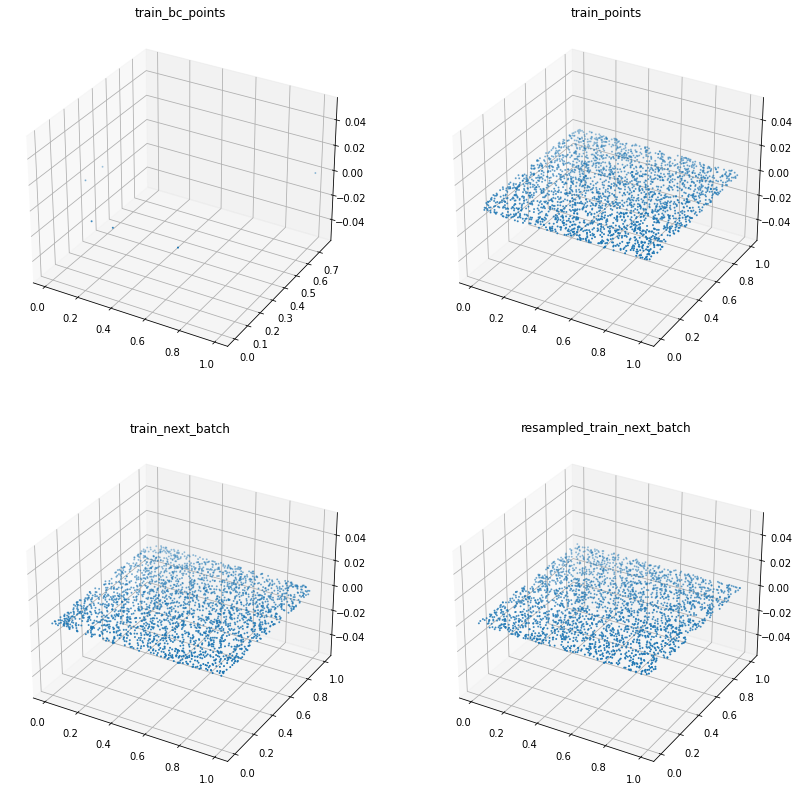

In [6]:
test_params = PinnTestParam()
test_params.d_num_boundary = 3
test_params.d_num_initial = 3

geomtime_data, model = create_model(const_params, test_params)
plot_train_data(geomtime_data)

Compiling model...
Building feed-forward neural network...
'build' took 0.031414 s



/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-12-13 16:43:07.562947: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set


'compile' took 0.221379 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [7.14e-02, 4.04e-03, 7.97e-01]    [7.21e-02, 4.04e-03, 7.97e-01]    []  
1000      [5.03e-04, 1.08e-03, 2.15e-03]    [3.75e-04, 1.08e-03, 2.15e-03]    []  
2000      [2.72e-04, 4.14e-05, 3.02e-04]    [1.86e-04, 4.14e-05, 3.02e-04]    []  
3000      [1.41e-04, 1.47e-05, 5.63e-05]    [1.12e-04, 1.47e-05, 5.63e-05]    []  
4000      [6.89e-05, 1.48e-06, 1.86e-05]    [4.90e-05, 1.48e-06, 1.86e-05]    []  
5000      [3.45e-05, 7.78e-07, 5.76e-06]    [2.49e-05, 7.78e-07, 5.76e-06]    []  
6000      [2.12e-05, 2.23e-07, 1.85e-06]    [1.67e-05, 2.23e-07, 1.85e-06]    []  
7000      [1.66e-05, 1.03e-07, 8.24e-07]    [1.37e-05, 1.03e-07, 8.24e-07]    []  
8000      [1.39e-05, 4.03e-08, 5.29e-07]    [1.17e-05, 4.03e-08, 5.29e-07]    []  
9000      [1.18e-05, 2.54e-08, 3.51e-07]    [1.00e-05, 2.54e-08, 3.51e-07]    []  
10000   

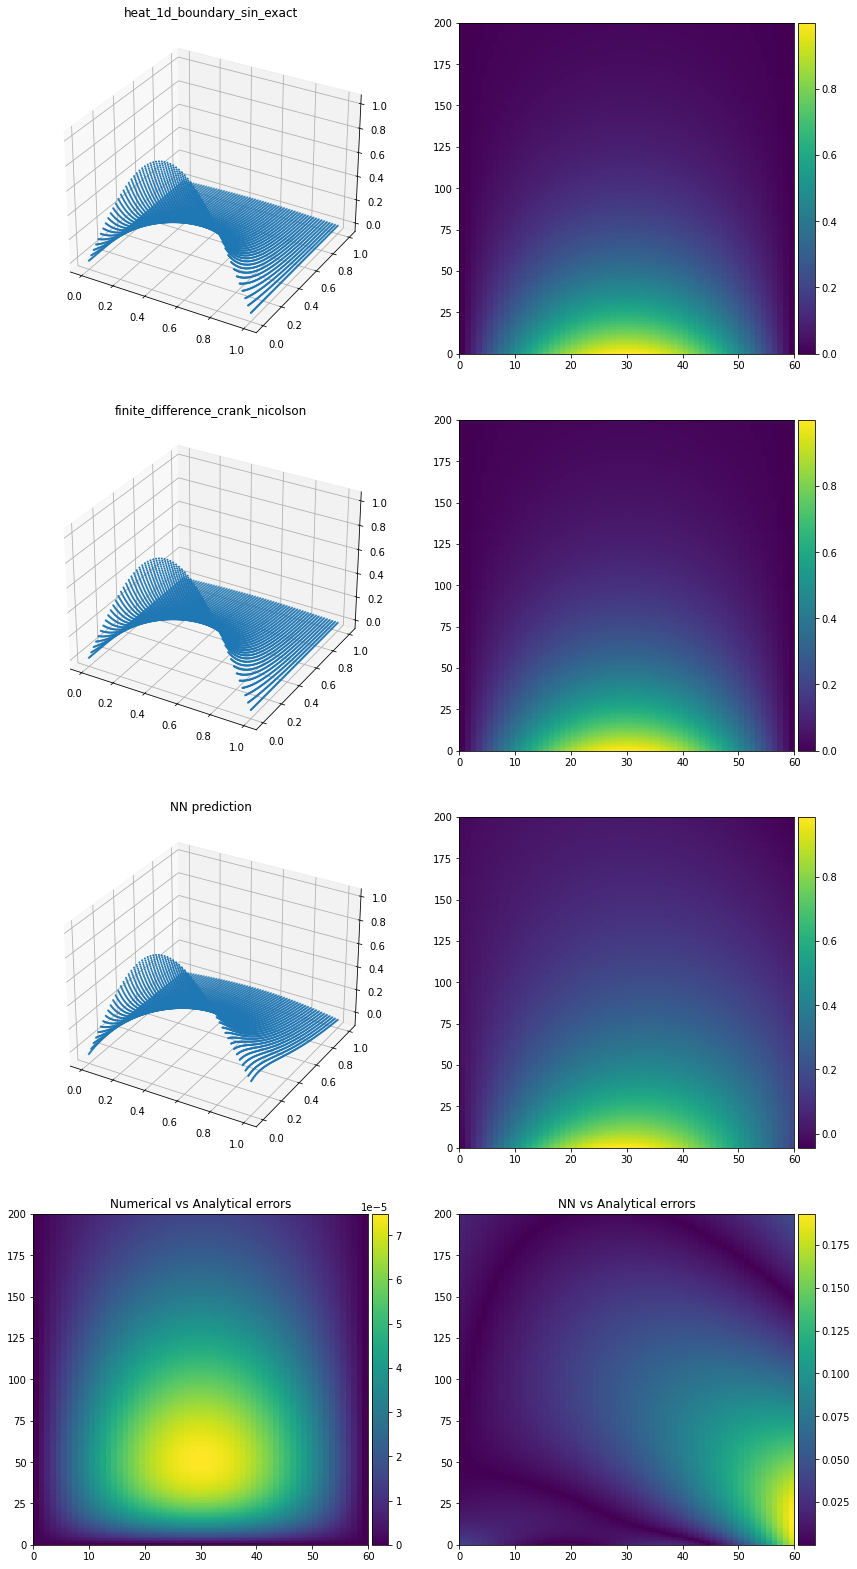

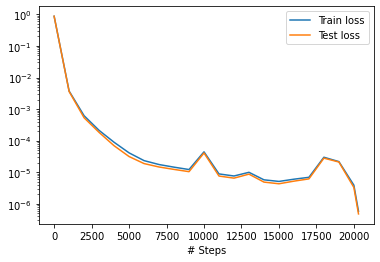

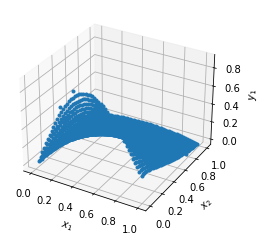

IGNORE ^^^ PDE test data SOLUTION PLOT!!! ^^^
--- Numerical vs Analytical Report ---
Mean absolute error:  2.9059873630420946e-05
Mean squared error:  1.26415187285393e-09
Max error:  7.483296180527121e-05
--- NN vs Analytical Report ---
Mean absolute error:  0.037421319151811294
Mean squared error:  0.0028277127910935067
Max error:  0.19310723245143882
Pinn Const Param: 
a: 0.4
L: 1
n: 1
t_end: 1
test_x_dim: 60
test_t_dim: 200
analytical_function_name: heat_1d_boundary_sin_exact
numerical_function_name: finite_difference_crank_nicolson

Pinn Test Param: 
d_num_domain: 2540
d_num_boundary: 3
d_num_initial: 3
nn_hidden_layer_size: 20
nn_hidden_layer_num: 3



In [7]:
# Train model and output results
losshistory, train_state = train_model(model)
predict_and_output_report(const_params, model, losshistory, train_state, test_params=test_params)

# Test 4: Reduce domain to break solution

train_bc_points shape (240, 2)
train_points shape (290, 2)
train_next_batch shape (530, 2)


/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+52=52. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "


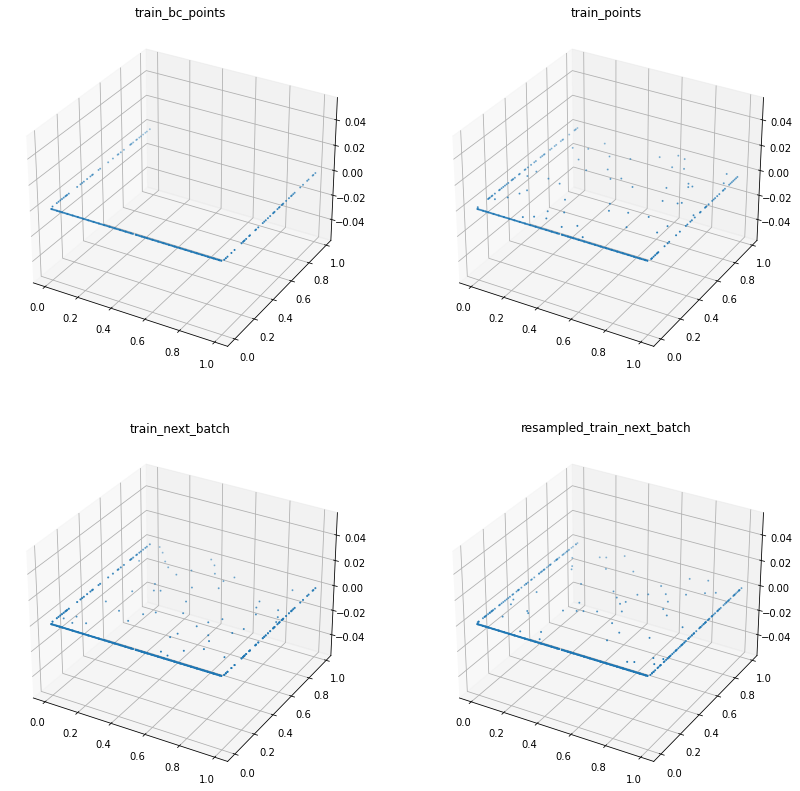

In [8]:
test_params = PinnTestParam()
test_params.d_num_domain = 50

geomtime_data, model = create_model(const_params, test_params)
plot_train_data(geomtime_data)

Compiling model...
Building feed-forward neural network...
'build' took 0.031775 s



/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-12-13 16:44:05.612571: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set


'compile' took 0.228238 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [2.73e-01, 1.43e-01, 3.80e-01]    [2.34e-01, 1.43e-01, 3.80e-01]    []  
1000      [2.12e-03, 1.77e-03, 1.24e-03]    [8.08e-03, 1.77e-03, 1.24e-03]    []  
2000      [3.82e-04, 9.76e-05, 8.26e-05]    [1.26e-03, 9.76e-05, 8.26e-05]    []  
3000      [9.94e-05, 4.98e-05, 3.48e-05]    [2.57e-04, 4.98e-05, 3.48e-05]    []  
4000      [1.56e-04, 3.99e-05, 2.08e-05]    [2.31e-04, 3.99e-05, 2.08e-05]    []  
5000      [4.40e-05, 2.68e-05, 1.30e-05]    [1.88e-04, 2.68e-05, 1.30e-05]    []  
6000      [3.66e-05, 2.12e-05, 9.10e-06]    [1.67e-04, 2.12e-05, 9.10e-06]    []  
7000      [2.98e-05, 1.75e-05, 6.63e-06]    [1.49e-04, 1.75e-05, 6.63e-06]    []  
8000      [2.56e-05, 1.48e-05, 5.13e-06]    [1.34e-04, 1.48e-05, 5.13e-06]    []  
9000      [2.29e-05, 1.26e-05, 4.19e-06]    [1.21e-04, 1.26e-05, 4.19e-06]    []  
10000   

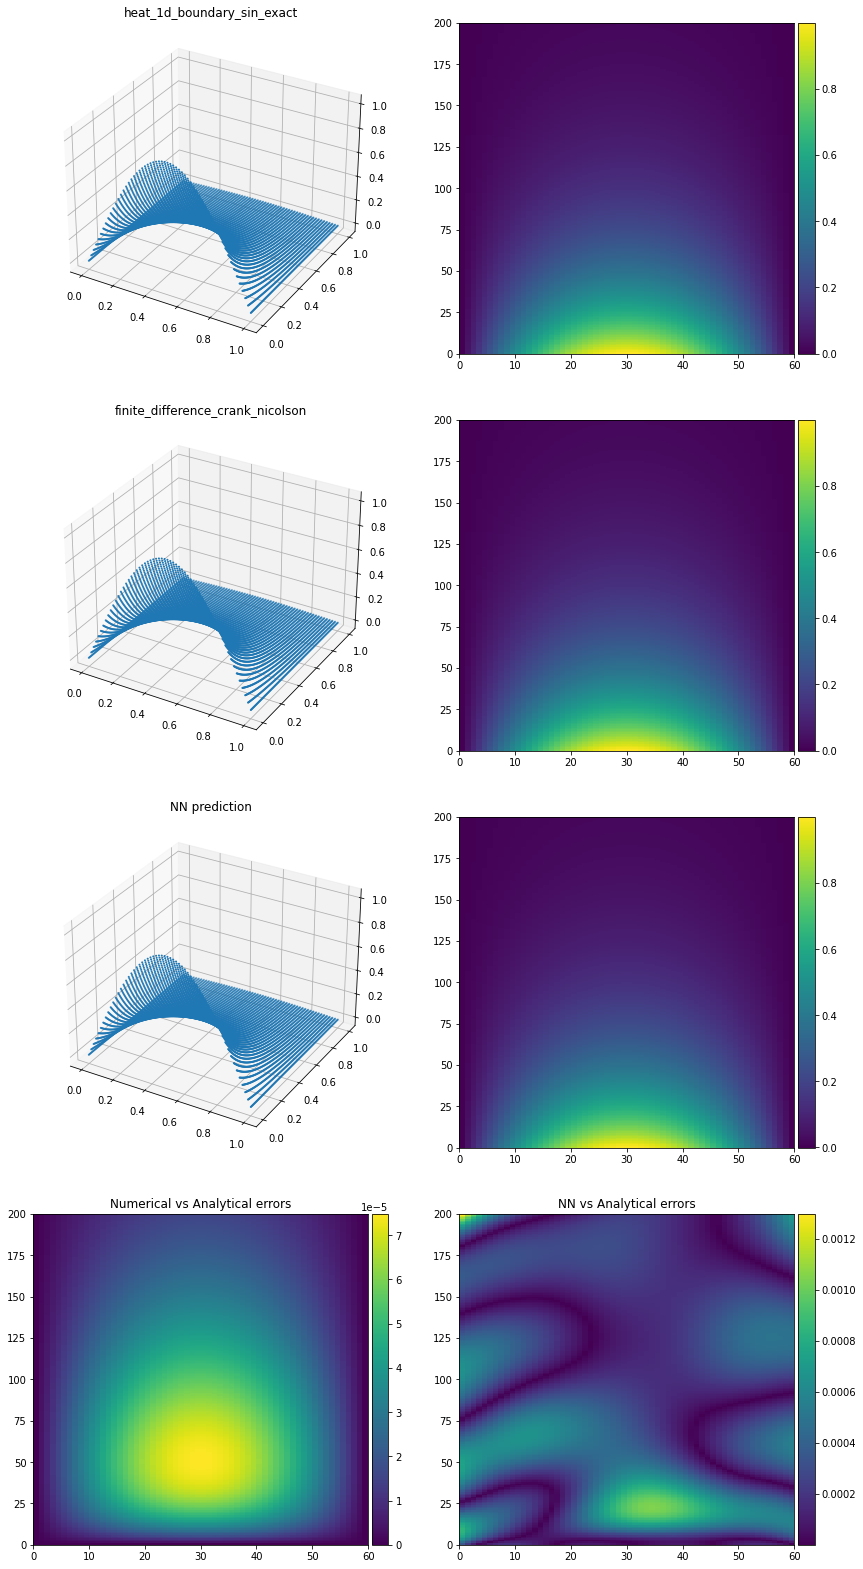

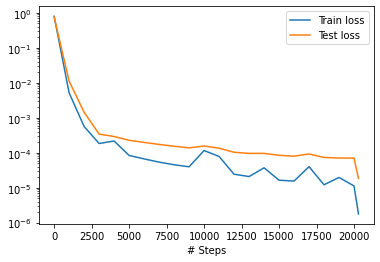

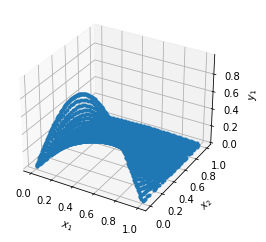

IGNORE ^^^ PDE test data SOLUTION PLOT!!! ^^^
--- Numerical vs Analytical Report ---
Mean absolute error:  2.9059873630420946e-05
Mean squared error:  1.26415187285393e-09
Max error:  7.483296180527121e-05
--- NN vs Analytical Report ---
Mean absolute error:  0.0002883307015102263
Mean squared error:  1.2455564852398865e-07
Max error:  0.0012966543436050415
Pinn Const Param: 
a: 0.4
L: 1
n: 1
t_end: 1
test_x_dim: 60
test_t_dim: 200
analytical_function_name: heat_1d_boundary_sin_exact
numerical_function_name: finite_difference_crank_nicolson

Pinn Test Param: 
d_num_domain: 50
d_num_boundary: 80
d_num_initial: 160
nn_hidden_layer_size: 20
nn_hidden_layer_num: 3



In [9]:
# Train model and output results
losshistory, train_state = train_model(model)
predict_and_output_report(const_params, model, losshistory, train_state, test_params=test_params)


# Test 5: Sparse train data (domain and bc) but still get good solution

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+52=52. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+15=15. 
  warnings.warn("The balance properties of Sobol' points require "


train_bc_points shape (26, 2)
train_points shape (76, 2)
train_next_batch shape (102, 2)


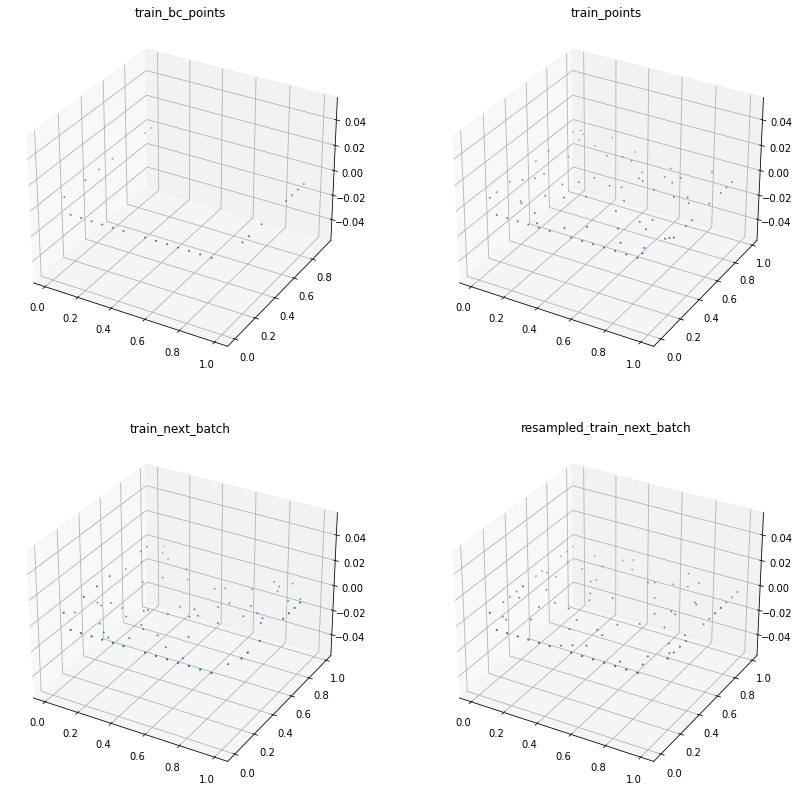

In [3]:
test_params = PinnTestParam()
test_params.d_num_domain = 50
test_params.d_num_boundary = 13
test_params.d_num_initial = 13

geomtime_data, model = create_model(const_params, test_params)
plot_train_data(geomtime_data)

Compiling model...
Building feed-forward neural network...
'build' took 0.039453 s



/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-12-14 14:09:15.692228: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-14 14:09:15.692924: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-12-14 14:09:15.735961: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS ha

'compile' took 1.339224 s



2021-12-14 14:09:16.814753: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1261] Device interconnect StreamExecutor with strength 1 edge matrix:
2021-12-14 14:09:16.814788: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1267]      0 
2021-12-14 14:09:16.814795: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1280] 0:   N 
2021-12-14 14:09:16.815381: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-14 14:09:16.815882: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-14 14:09:16.816398: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-

Initializing variables...
Training model...



2021-12-14 14:09:17.024466: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3593345000 Hz
2021-12-14 14:09:17.094284: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


Step      Train loss                        Test loss                         Test metric
0         [4.52e-02, 1.36e-02, 5.90e-01]    [4.56e-02, 1.36e-02, 5.90e-01]    []  
1000      [8.20e-04, 1.91e-04, 4.03e-04]    [1.48e-03, 1.91e-04, 4.03e-04]    []  
2000      [4.95e-04, 7.71e-05, 1.62e-04]    [5.91e-04, 7.71e-05, 1.62e-04]    []  
3000      [1.25e-04, 2.24e-05, 2.16e-05]    [2.42e-04, 2.24e-05, 2.16e-05]    []  
4000      [1.42e-04, 4.91e-05, 2.09e-05]    [2.21e-04, 4.91e-05, 2.09e-05]    []  
5000      [2.96e-05, 4.69e-06, 3.08e-06]    [1.15e-04, 4.69e-06, 3.08e-06]    []  
6000      [2.79e-05, 7.58e-06, 1.54e-05]    [1.13e-04, 7.58e-06, 1.54e-05]    []  
7000      [1.87e-04, 5.16e-05, 1.50e-05]    [2.05e-04, 5.16e-05, 1.50e-05]    []  
8000      [1.36e-05, 1.36e-06, 5.08e-07]    [8.48e-05, 1.36e-06, 5.08e-07]    []  
9000      [1.47e-05, 4.40e-06, 9.49e-06]    [8.07e-05, 4.40e-06, 9.49e-06]    []  
10000     [1.21e-05, 8.36e-06, 1.23e-05]    [8.48e-05, 8.36e-06, 1.23e-05]    []

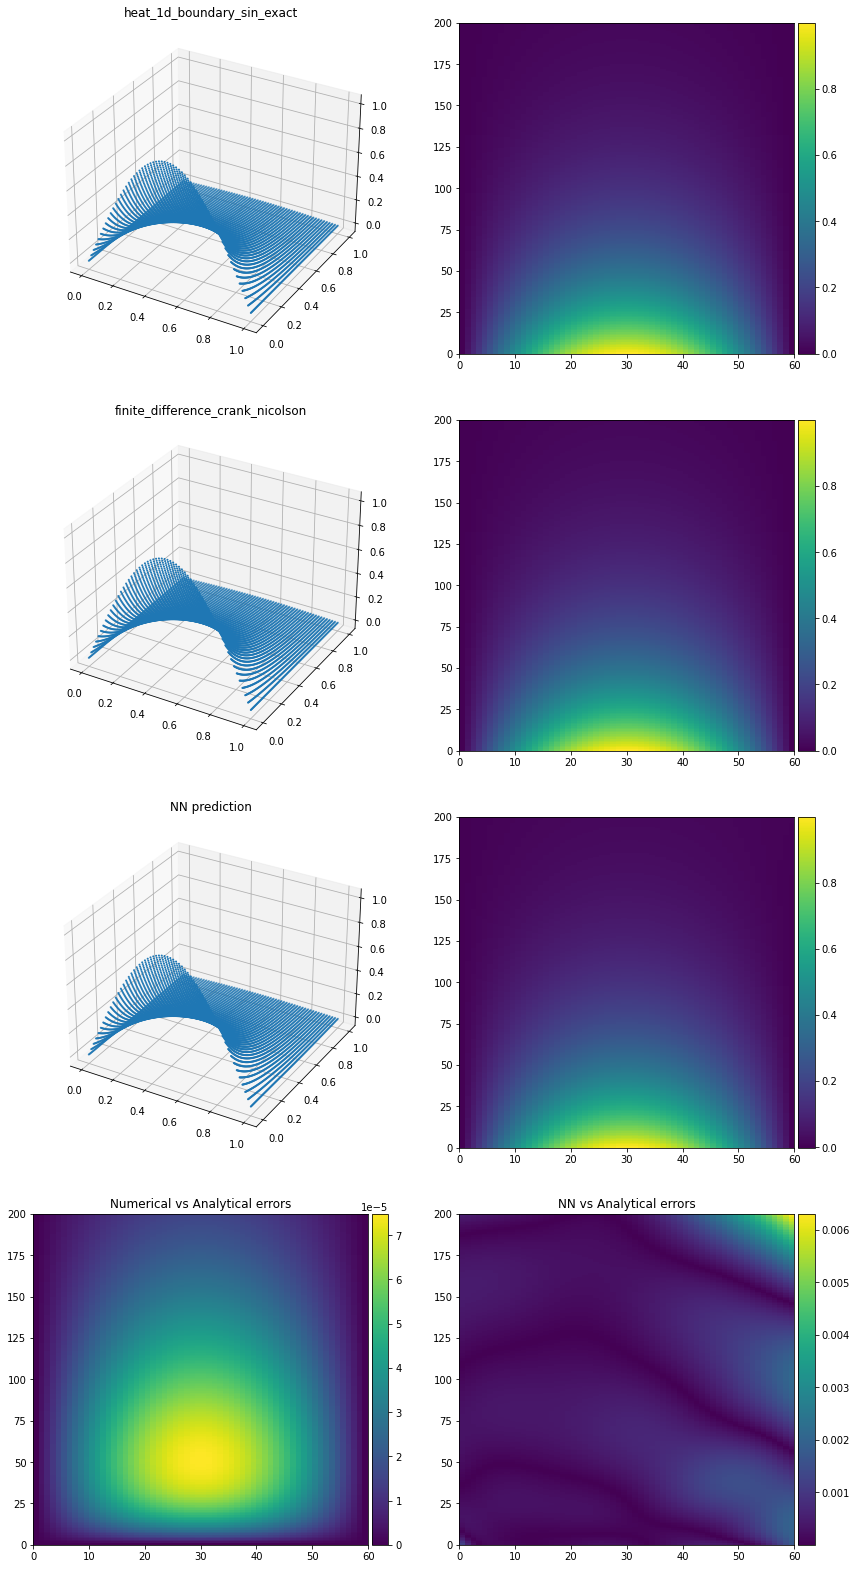

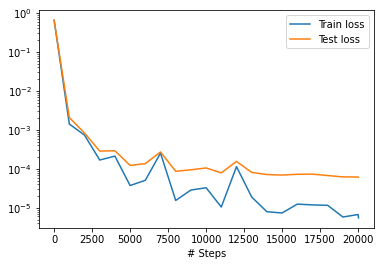

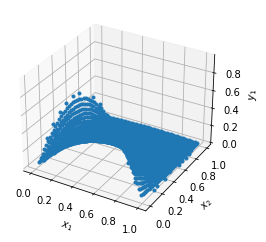

IGNORE ^^^ PDE test data SOLUTION PLOT!!! ^^^
--- Numerical vs Analytical Report ---
Mean absolute error:  2.9059873630420946e-05
Mean squared error:  1.26415187285393e-09
Max error:  7.483296180527121e-05
--- NN vs Analytical Report ---
Mean absolute error:  0.000516815030674637
Mean squared error:  6.549079316654715e-07
Max error:  0.006298163905739782
Pinn Const Param: 
a: 0.4
L: 1
n: 1
t_end: 1
test_x_dim: 60
test_t_dim: 200
analytical_function_name: heat_1d_boundary_sin_exact
numerical_function_name: finite_difference_crank_nicolson

Pinn Test Param: 
d_num_domain: 50
d_num_boundary: 13
d_num_initial: 13
nn_hidden_layer_size: 20
nn_hidden_layer_num: 3



In [4]:
# Train model and output results
losshistory, train_state = train_model(model)
predict_and_output_report(const_params, model, losshistory, train_state, test_params=test_params)
